In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)

# **Question 1**


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# of vertices: 1000 
# of edges: 1502 
Is connected: FALSE 
mean for p = 0.003  is 0.0909090909090909 
variance for p = 0.003  is 0.00741049090909091 
# of vertices: 1000 
# of edges: 1988 
Is connected: FALSE 
mean for p = 0.004  is 0.0833333333333333 
variance for p = 0.004  is 0.00546424242424242 


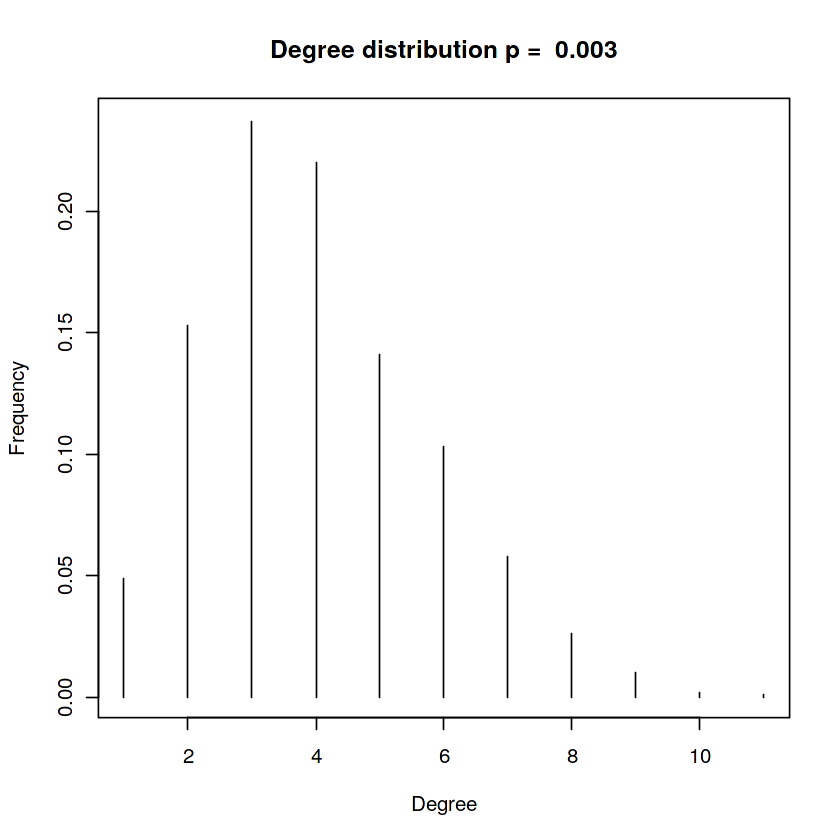

# of vertices: 1000 
# of edges: 4860 
Is connected: TRUE 
mean for p = 0.01  is 0.0454545454545455 
variance for p = 0.01  is 0.00216397402597403 


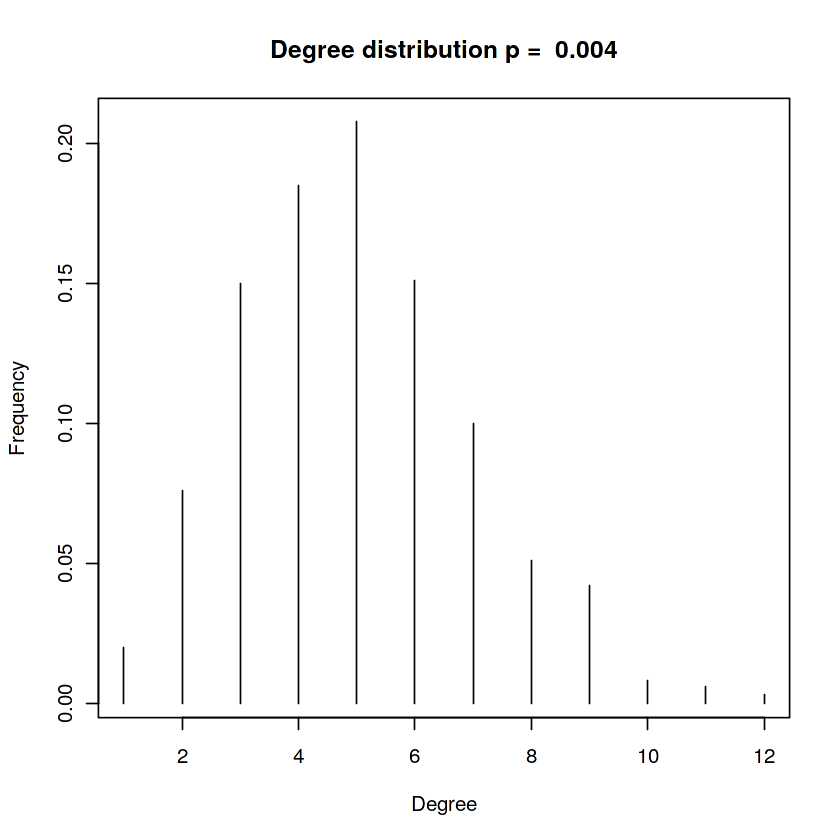

# of vertices: 1000 
# of edges: 25163 
Is connected: TRUE 
mean for p = 0.05  is 0.0128205128205128 
variance for p = 0.05  is 0.000361629703629704 


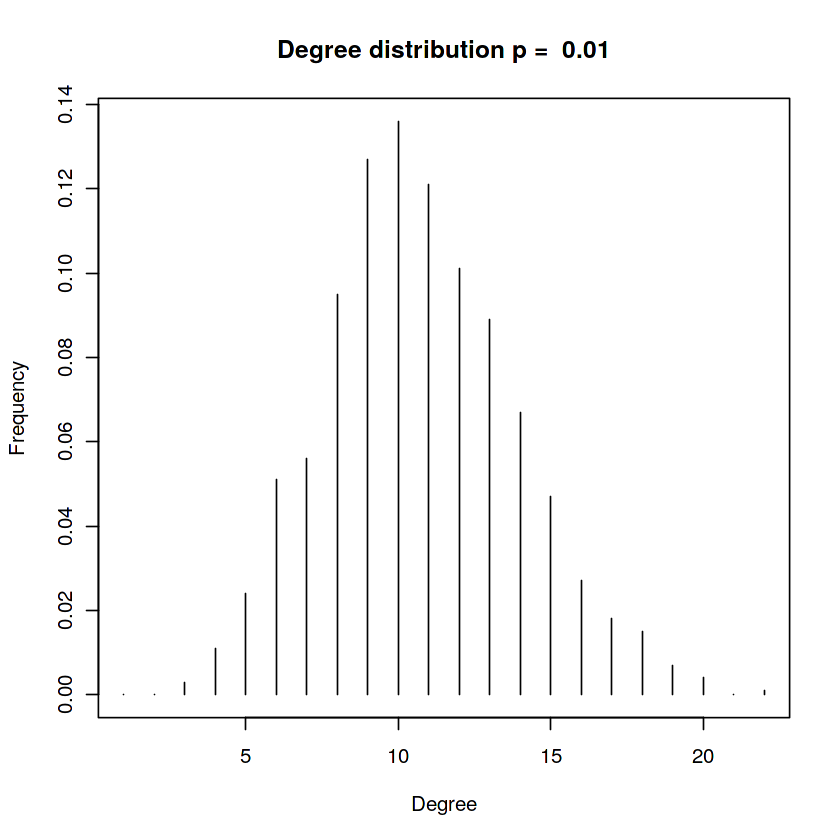

# of vertices: 1000 
# of edges: 49960 
Is connected: TRUE 
mean for p = 0.1  is 0.0072992700729927 
variance for p = 0.1  is 0.000174990661227995 


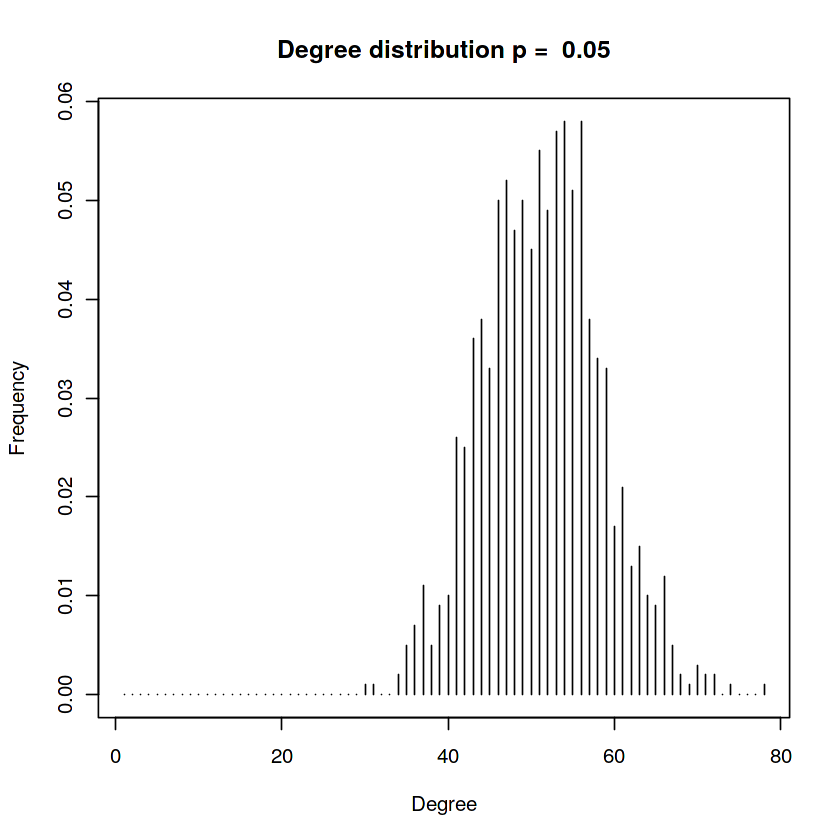

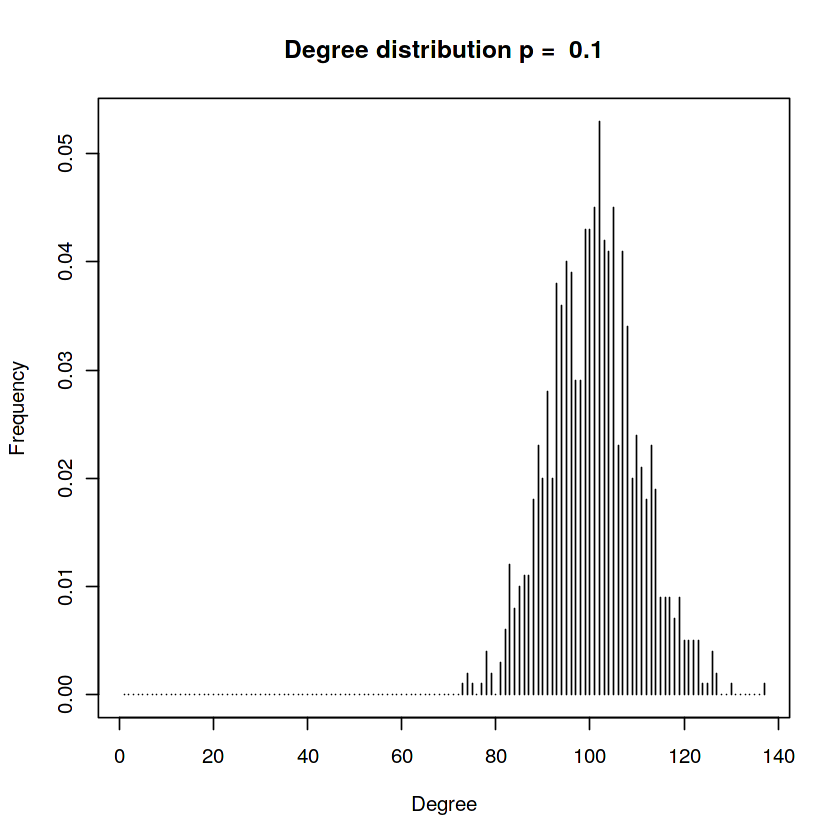

In [2]:
library(igraph)
# part1
#probability 0.003, 0.004, 0.01, 0.05, 0.1
#sample_gnp(n, p, directed = FALSE, loops = FALSE)

#plot; find mean, variance of degree distribution
x <- c(0.003, 0.004, 0.01, 0.05, 0.1)
count <- 0
for (val in x)
{
    g <- sample_gnp(1000, val, directed = FALSE, loops = FALSE) # make a random network
    cat("# of vertices:", vcount(g), "\n")
    cat("# of edges:", ecount(g), "\n")
    cat("Is connected:", is_connected(g), "\n")
    deg <- degree_distribution(g)
    cat(paste("mean for p =", val, " is", mean(deg), "\n", sep=" "))
    cat(paste("variance for p =", val, " is", var(deg), "\n", sep=" "))
    
    plot(deg, type="h", xlab = "Degree", ylab = "Frequency", main = paste("Degree distribution p = ", val, sep=" "))
}

# mean theoretical degree = p(n-1) ?


In [3]:
#part b

#is_connected, clusters, diameter


#run estimate 100 times to get numerically estimated % connected/not connected


x <- c(0.003, 0.004, 0.01, 0.05, 0.1)
count <- 0
runOnce <-0

get_gcc2 <- function(graph)
{
    cl <- clusters(graph)
    gcc <- induced_subgraph(graph, which(cl$membership == which.max(cl$csize)))
    return(gcc)
}

for (val in x)
{
    for(i in 1:100)
    {
        g <- sample_gnp(1000, val, directed = FALSE, loops = FALSE) # make a random network
        if(is_connected(g))
        {
            count = count + 1
        }
        else if(runOnce == 0)
        {
            gcc <- get_gcc2(g)
            cat(paste("Diameter of GCC for p = ", val, ": ", diameter(gcc), "\n", sep=""))
            runOnce <- 1
        }
    }
    cat(paste("For p = ", val, ", % connected is ", count, "%", "\n", sep=""))
    count <- 0
    runOnce <- 0
}

Diameter of GCC for p = 0.003: 14
For p = 0.003, % connected is 0%
Diameter of GCC for p = 0.004: 10
For p = 0.004, % connected is 0%
Diameter of GCC for p = 0.01: 5
For p = 0.01, % connected is 94%
For p = 0.05, % connected is 100%
For p = 0.1, % connected is 100%


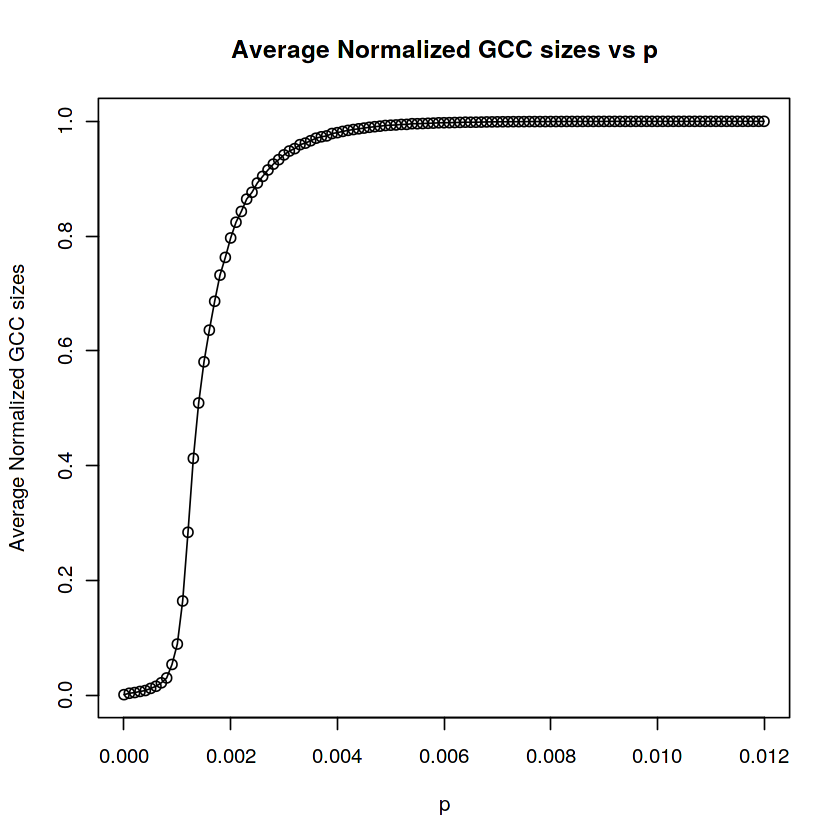

In [4]:
#part c


#use p_max = 0.02



y <- seq(from=0, to=0.012, by=0.0001)


#plotting vectors
all_gcc <- vector()



for (val in y)
{
    temp_max_size <- c()
    for(i in 1:100)
    {
        g <- sample_gnp(1000, val, directed = FALSE, loops = FALSE) # make a random network
        temp_max_size <- c(temp_max_size, max(components(g)$csize))
    }
    all_gcc <- c(all_gcc, mean(temp_max_size)/1000) 

}
plot(y, all_gcc, type="o", main="Average Normalized GCC sizes vs p",xlab="p",ylab="Average Normalized GCC sizes")

#0.012 - 99% out of 100 trials

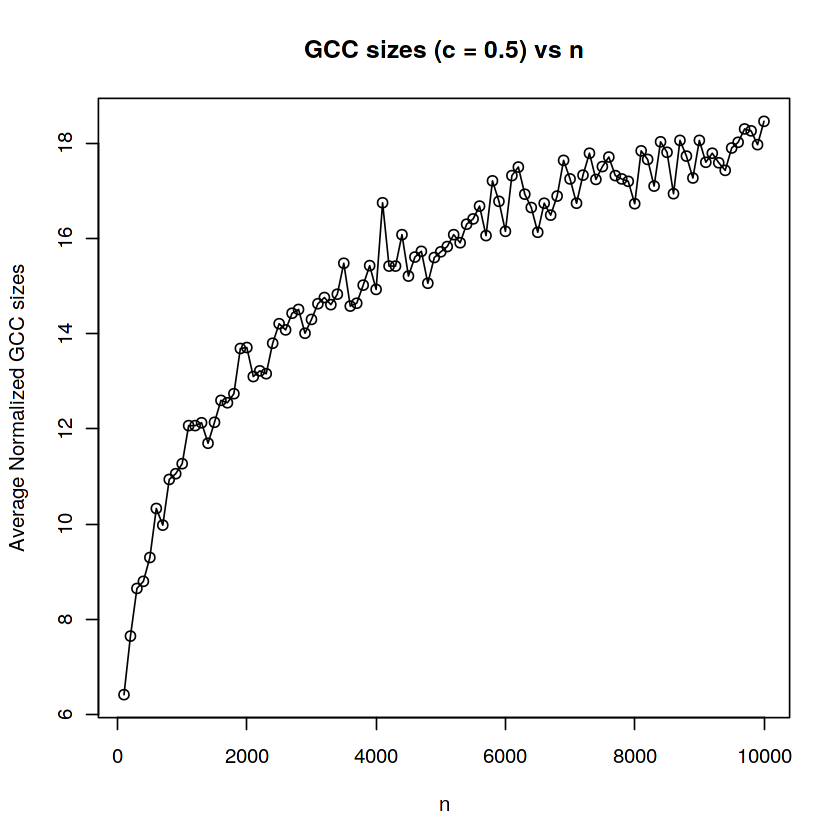

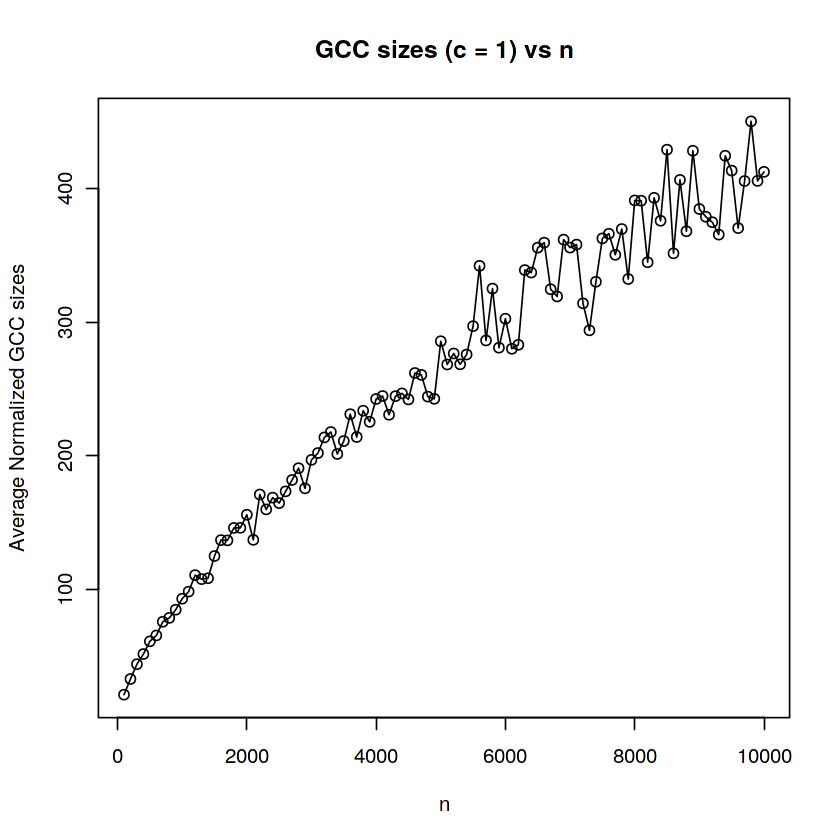

In [5]:
#part d

#100 to 10000
#c = 0.5 = np
#p = c/n = 1/(2n)


z <- seq(from=100, to=10000, by=100)


#plotting vectors
all_gcc <- vector()


c_val <- 0.5

for (nodes in z)
{
    temp_max_size <- c()
    for(i in 1:100)
    {
        g <- sample_gnp(nodes, c_val/nodes, directed = FALSE, loops = FALSE)
        temp_max_size <- c(temp_max_size, max(components(g)$csize))
    }
    all_gcc <- c(all_gcc, mean(temp_max_size)) 

}
plot(z, all_gcc, type="o", main=paste("GCC sizes (c = ", c_val, ") vs n", sep=""),xlab="n",ylab="Average Normalized GCC sizes")

#reset values
all_gcc <- vector()
c_val <- 1

for (nodes in z)
{
    temp_max_size <- c()
    for(i in 1:100)
    {
        g <- sample_gnp(nodes, c_val/nodes, directed = FALSE, loops = FALSE)
        temp_max_size <- c(temp_max_size, max(components(g)$csize))
    }
    all_gcc <- c(all_gcc, mean(temp_max_size)) 

}
plot(z, all_gcc, type="o", main=paste("GCC sizes (c = ", c_val, ") vs n", sep=""),xlab="n",ylab="Average Normalized GCC sizes")



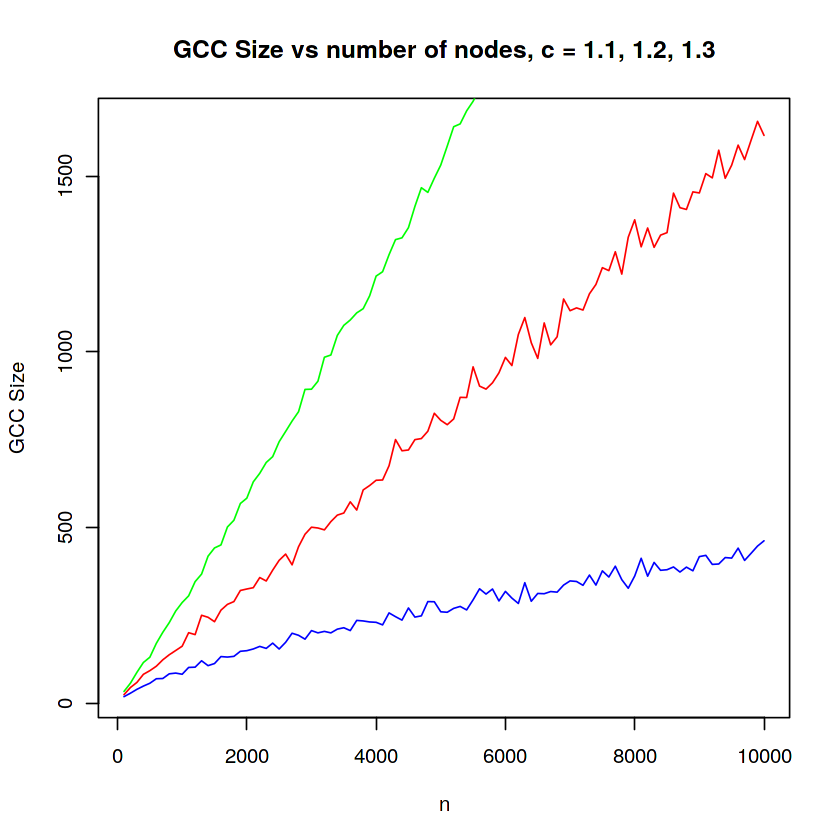

In [6]:
# 1.1, 1.2, 1.3


#reset values
all_gcc_a <- vector()
c_val_a <- 1.1
z <- seq(from=100, to=10000, by=100)


for (nodes in z)
{
    temp_max_size <- c()
    for(i in 1:100)
    {
        g <- sample_gnp(nodes, c_val_a/nodes, directed = FALSE, loops = FALSE)
        temp_max_size <- c(temp_max_size, max(components(g)$csize))
    }
    all_gcc_a <- c(all_gcc_a, mean(temp_max_size)) 

}
#plot(z, all_gcc_a, type="o", main="GCC sizes vs n" col="green",xlab="n",ylab="Average Normalized GCC sizes")
#par(new=TRUE)

all_gcc_b <- vector()
c_val_b <- 1.2

for (nodes in z)
{
    temp_max_size <- c()
    for(i in 1:100)
    {
        g <- sample_gnp(nodes, c_val_b/nodes, directed = FALSE, loops = FALSE)
        temp_max_size <- c(temp_max_size, max(components(g)$csize))
    }
    all_gcc_b <- c(all_gcc_b, mean(temp_max_size)) 

}
#plot(z, all_gcc, type="o", col="red")


all_gcc_c <- vector()
c_val_c <- 1.3

for (nodes in z)
{
    temp_max_size <- c()
    for(i in 1:100)
    {
        g <- sample_gnp(nodes, c_val/nodes, directed = FALSE, loops = FALSE)
        temp_max_size <- c(temp_max_size, max(components(g)$csize))
    }
    all_gcc_c <- c(all_gcc_c, mean(temp_max_size)) 

}
#plot(z, all_gcc, type="o", col="green")

plot(z, all_gcc_a, type="l",col="red", xlab="n", ylab="GCC Size", main="GCC Size vs number of nodes, c = 1.1, 1.2, 1.3")
lines(z, all_gcc_b, col="green")
lines(z, all_gcc_c, col="blue")


# Question 1.2

In [7]:
#part a

p_count <- 0
for(i in 1:1000)
{
    g_p <- sample_pa(1000, m=1, directed=FALSE)
    if(is_connected(g_p))
    {
        p_count = p_count + 1
    }

}
cat(paste("For preferential attachment model (m=1), % connected is ", p_count/10, "%", "\n", sep=""))

For preferential attachment model (m=1), % connected is 100%


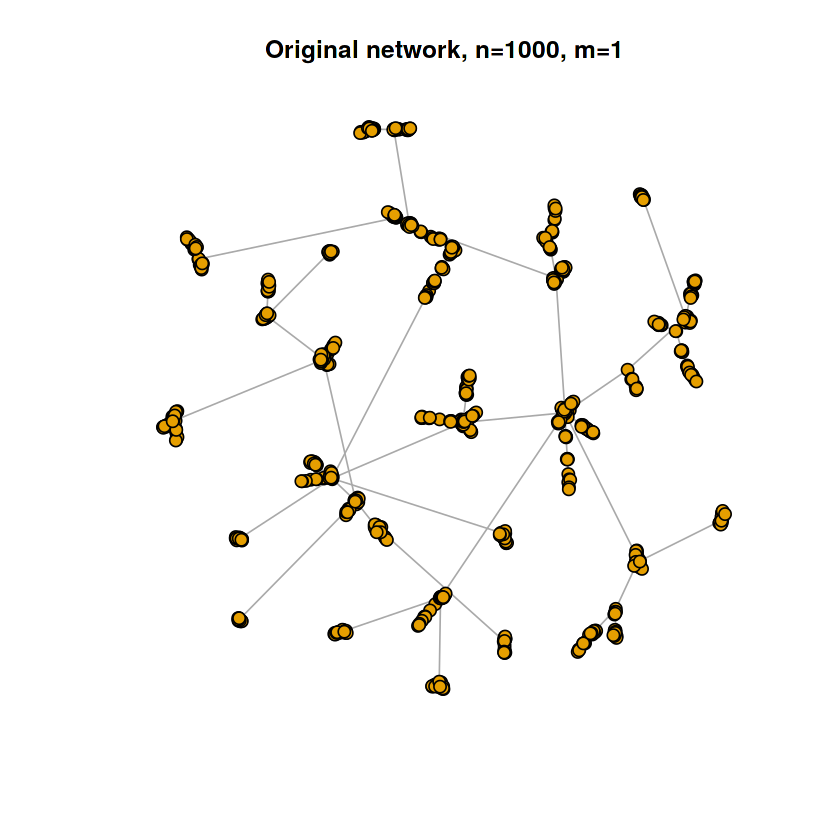

Modularity, n=1000: 0.933218503789076
Community size:  34

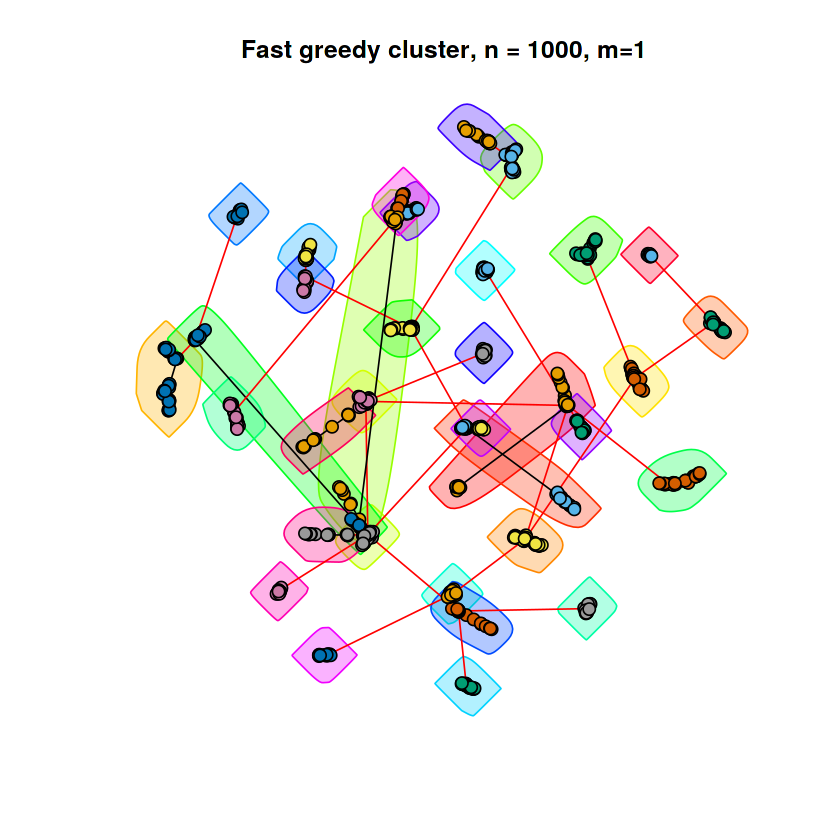

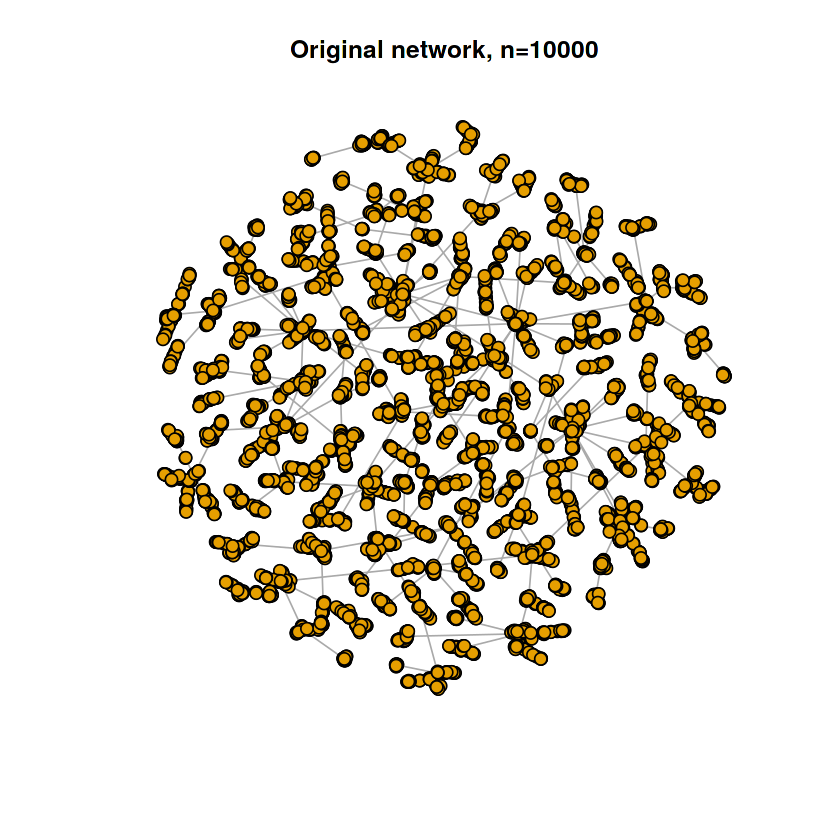

Modularity, n=10000: 0.97813079137698
Community size:  108

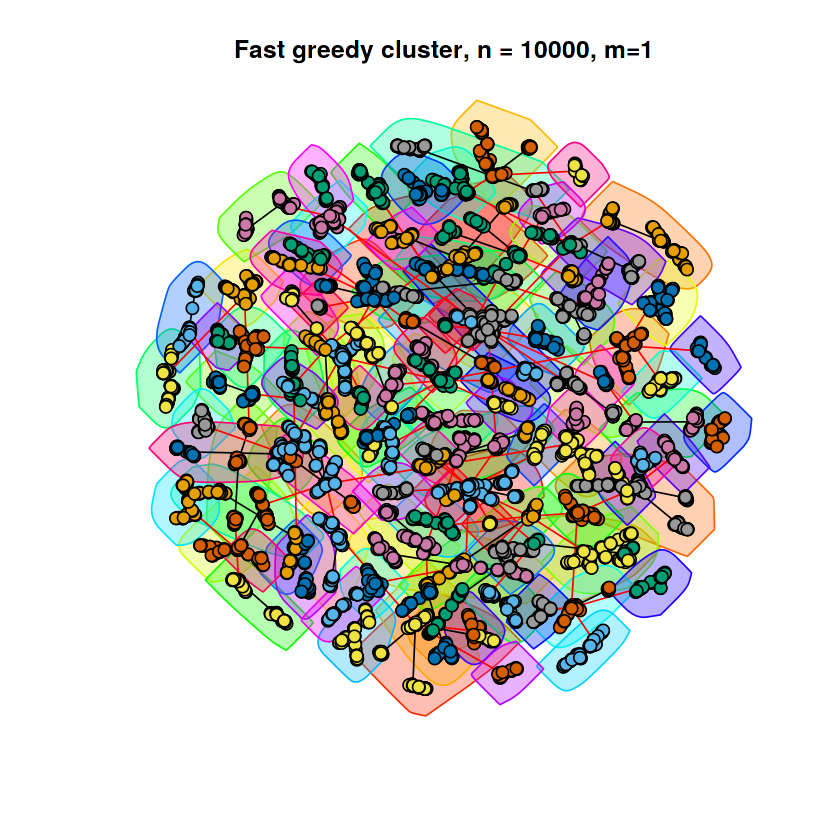

In [8]:
#part b, c

g_p <- sample_pa(1000, m=1, directed=FALSE)


greedy_p <- cluster_fast_greedy(g_p)
plot(g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Original network, n=1000, m=1")
plot(greedy_p, g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster, n = 1000, m=1")

mod_p <- modularity(greedy_p)
cat(paste("Modularity, n=1000: ", mod_p, "\n", sep=""))
cat(paste("Community size: ", length(greedy_p)))



large_g_p <- sample_pa(10000, m=1, directed=FALSE)


large_greedy_p <- cluster_fast_greedy(large_g_p)
plot(large_g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Original network, n=10000")
plot(large_greedy_p, large_g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster, n = 10000, m=1")

large_mod_p <- modularity(large_greedy_p)
cat(paste("Modularity, n=10000: ", large_mod_p, "\n", sep=""))
cat(paste("Community size: ", length(large_greedy_p)))

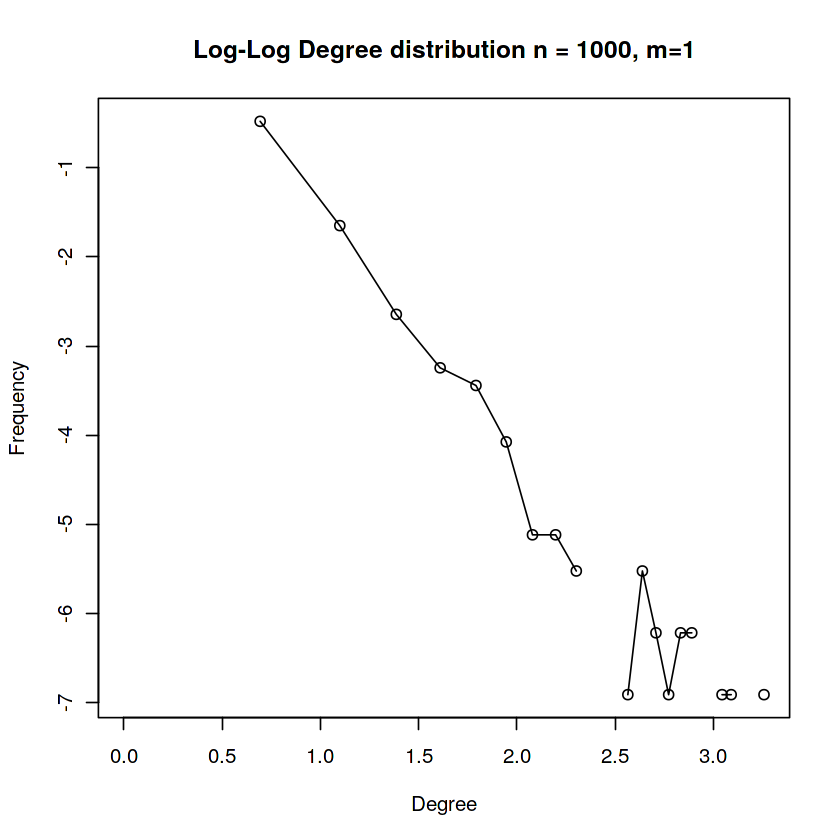


Call:
lm(formula = deg_log ~ log_x)

Coefficients:
(Intercept)        log_x  
     -2.314       -1.793  



Call:
lm(formula = large_deg_log ~ large_log_x)

Coefficients:
(Intercept)  large_log_x  
     -1.698       -2.073  


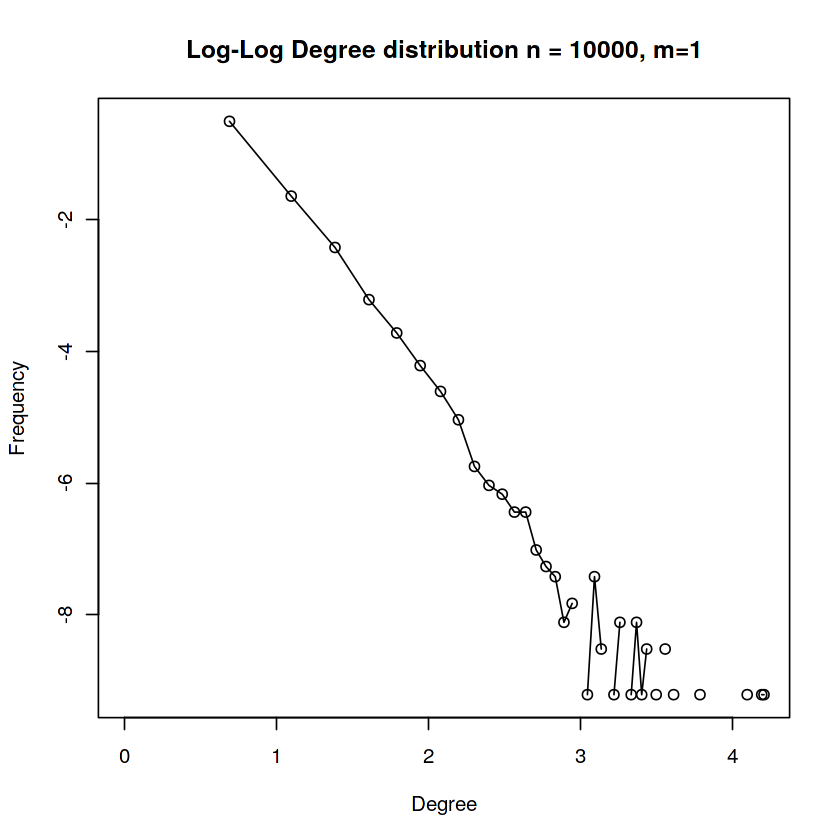

In [9]:
#part d

deg <- degree_distribution(g_p)
large_deg <- degree_distribution(large_g_p)

    
#x values
log_x <- log(c(1:length(deg)))
large_log_x <- log(c(1:length(large_deg)))
#y values
deg_log <- log(deg)
large_deg_log <- log(large_deg)

#plot log-log
plot(log_x, deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Degree distribution n = 1000, m=1")
plot(large_log_x, large_deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Degree distribution n = 10000, m=1")


#remove -inf from log(0)
deg_log = replace(deg_log, is.infinite(deg_log), -10)
lm(deg_log ~ log_x)

large_deg_log = replace(large_deg_log, is.infinite(large_deg_log), -10)
lm(large_deg_log ~ large_log_x)



Call:
lm(formula = rand_deg_log ~ rand_log_freq)

Coefficients:
  (Intercept)  rand_log_freq  
       4.2647        -0.6452  


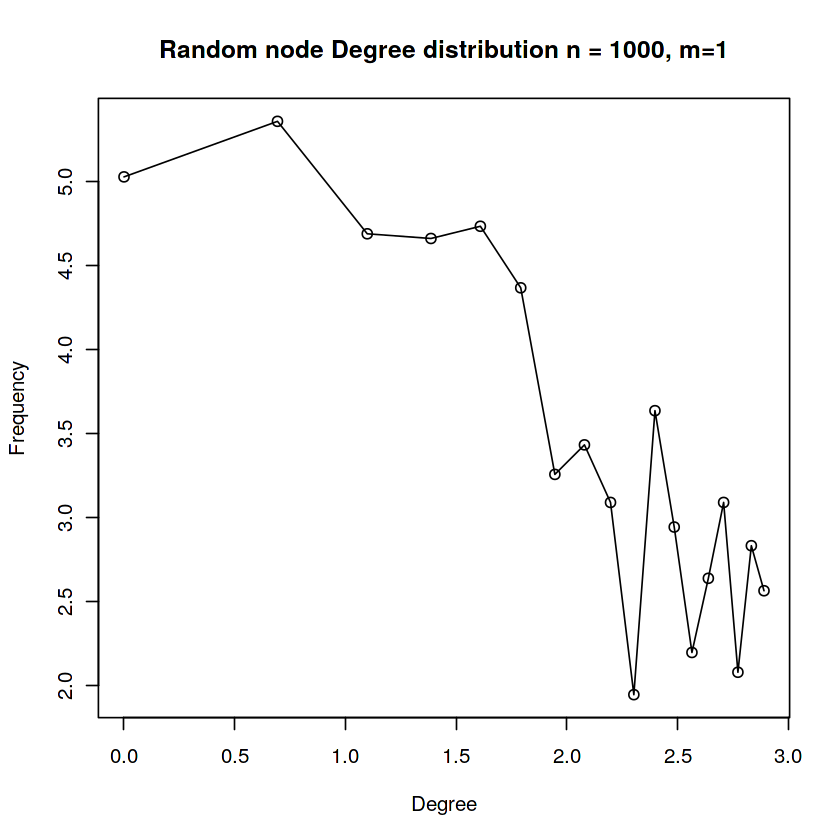


Call:
lm(formula = rand_deg_log ~ rand_log_freq)

Coefficients:
  (Intercept)  rand_log_freq  
       5.0308        -0.5413  


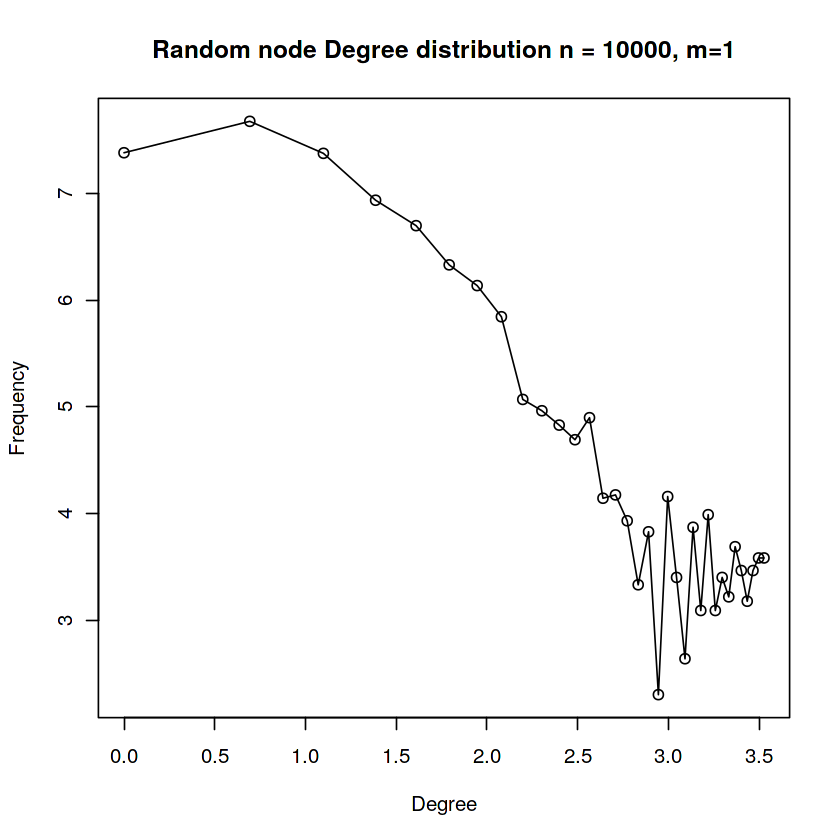

In [10]:
#part e

#g_p, large_g_p

n <- 1000
rand_degree <- c()

#pick random node i
for (i in 1:n) 
{
    rand_node <- sample(1:n, 1)
    #pick random neighbor j
    rand_neighbors <- neighbors(g_p, v=rand_node)
    if (length(neighbors) > 0)
    {
        neighbor_index <- sample(1:length(rand_neighbors), 1)
        rand_degree[i] <- degree(g_p, rand_neighbors[neighbor_index]) 
    }
}


# get degree - frequency vectors
deg_table <- as.data.frame(table(rand_degree))
#degrees <- as.numeric(as.vector((degree.freq.table[[1]])))
#freq <- degree.freq.table[[2]] / n


rand_deg_log <- log(as.numeric(deg_table$rand_degree))
rand_log_freq <- log(as.numeric(deg_table$Freq))

plot(rand_deg_log, rand_log_freq, type="o", xlab = "Degree", ylab = "Frequency", main = "Random node Degree distribution n = 1000, m=1")

#find slopes
rand_deg_log = replace(rand_deg_log, is.infinite(rand_deg_log), -10)
lm(rand_deg_log ~ rand_log_freq)


#do the same thing for n=10000

n <- 10000
rand_degree <- c()

#pick random node i
for (i in 1:n) 
{
    rand_node <- sample(1:n, 1)
    #pick random neighbor j
    rand_neighbors <- neighbors(large_g_p, v=rand_node)
    if (length(neighbors) > 0)
    {
        neighbor_index <- sample(1:length(rand_neighbors), 1)
        rand_degree[i] <- degree(large_g_p, rand_neighbors[neighbor_index]) 
    }
}


# get degree - frequency vectors
deg_table <- as.data.frame(table(rand_degree))


rand_deg_log <- log(as.numeric(deg_table$rand_degree))
rand_log_freq <- log(as.numeric(deg_table$Freq))

plot(rand_deg_log, rand_log_freq, type="o", xlab = "Degree", ylab = "Frequency", main = "Random node Degree distribution n = 10000, m=1")


#find slopes
rand_deg_log = replace(rand_deg_log, is.infinite(rand_deg_log), -10)
lm(rand_deg_log ~ rand_log_freq)



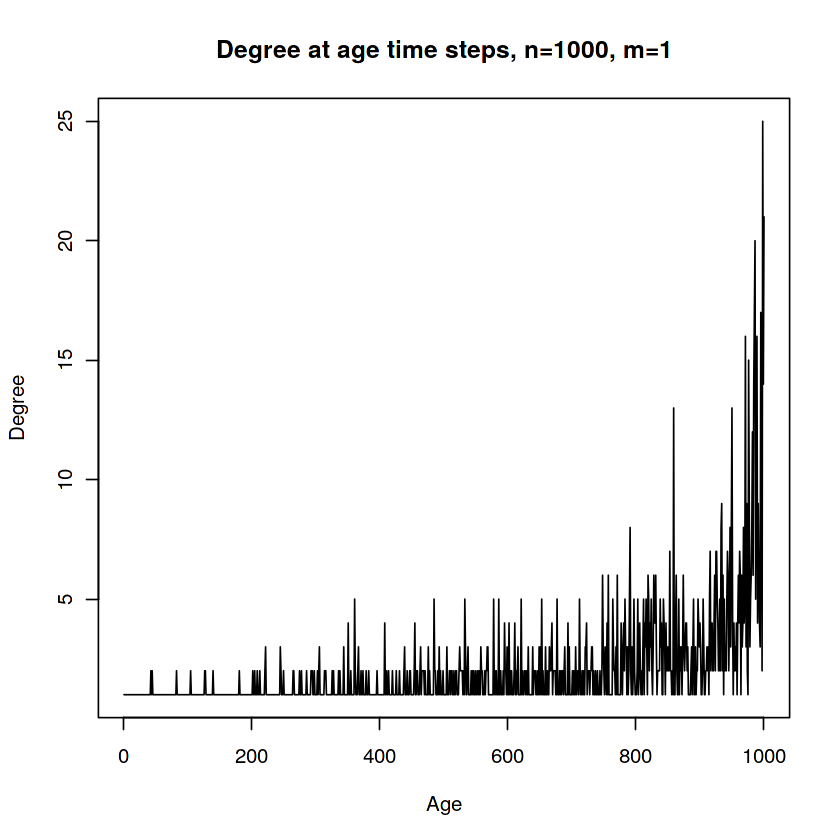

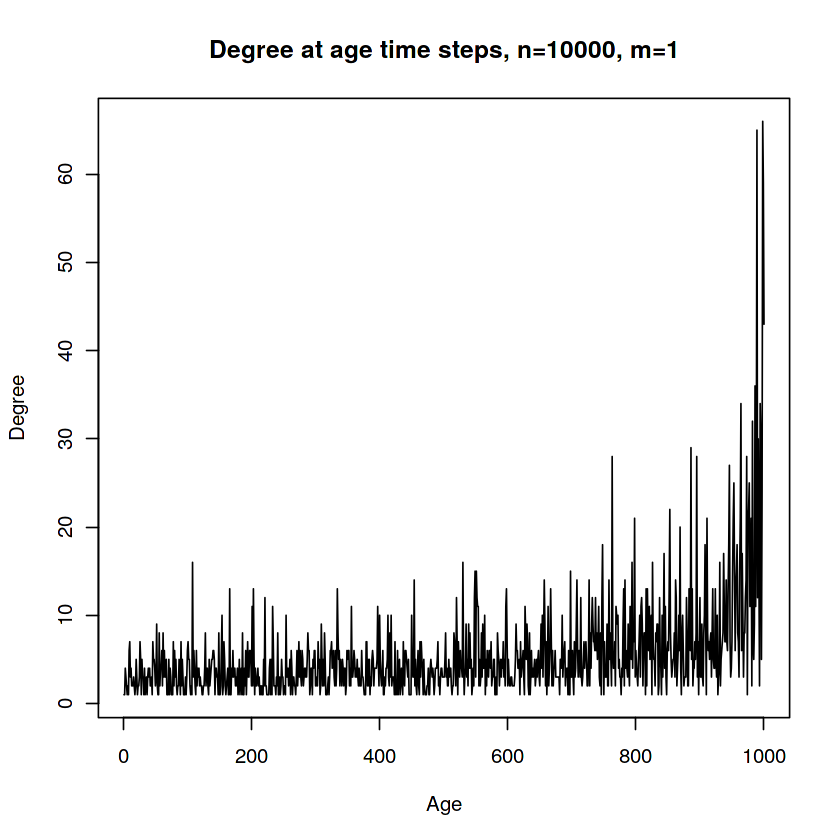

In [11]:
#part f

#g_p, large_g_p

age_deg <-rev(degree(g_p)[1:1000])
plot(age_deg, type='l', xlab = "Age", ylab = "Degree", main="Degree at age time steps, n=1000, m=1")

large_age_deg <-rev(degree(large_g_p)[1:1000])
plot(large_age_deg, type='l', xlab = "Age", ylab = "Degree", main="Degree at age time steps, n=10000, m=1")

In [12]:
#comment